<a href="https://colab.research.google.com/github/EZZRITOE/Hass-Consulting-week-7/blob/main/EZRA_MAGETO_WEEK_7_IP_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

#THE METRIC FOR SUCCESS
Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

#EXPERIMENTAL DESIGN
-Explore given dataset
-Define the appropriateness of the available data to answer the given question.
-Find and deal with outliers, anomalies, and missing data within the dataset.
-Perform univariate, bivariate and multivariate analysis recording your observations.
-Performing regression analysis.
-Incorporate categorical independent variables into your models.
-Check for multicollinearity
-Provide a recommendation based on your analysis.
-Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
-Challenge your solution by providing insights on how you can make improvements in model improvement

#1.READING THE DATASET

## Importing Libraries

In [2]:
#import the neccessary libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#loading the dataset
hass=pd.read_csv('Hass_consulting_data.csv')


## Exploring the Data

In [4]:
#checking the top of the data
hass.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#checking the bottom of the data
hass.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
#checking the shape of the data
hass.shape

(21613, 20)

In [7]:
#checking the columns
hass.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#checking the data types
hass.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
#checking information on different columns
hass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# Cleaning the Dataset 

##Exploratory Data Analysis

In [10]:
#checking for missing values
hass.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#checking for duplicates
hass.duplicated( keep=False).sum()

6

In [12]:
#dropping the duplicates
hass.drop_duplicates(keep = False, inplace = True)


In [13]:
#confirming the drop of duplicates
hass.duplicated().any()

False

In [14]:
#dropping columns we dont need
hass.drop(columns=['id', 'lat', 'long', 'waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)

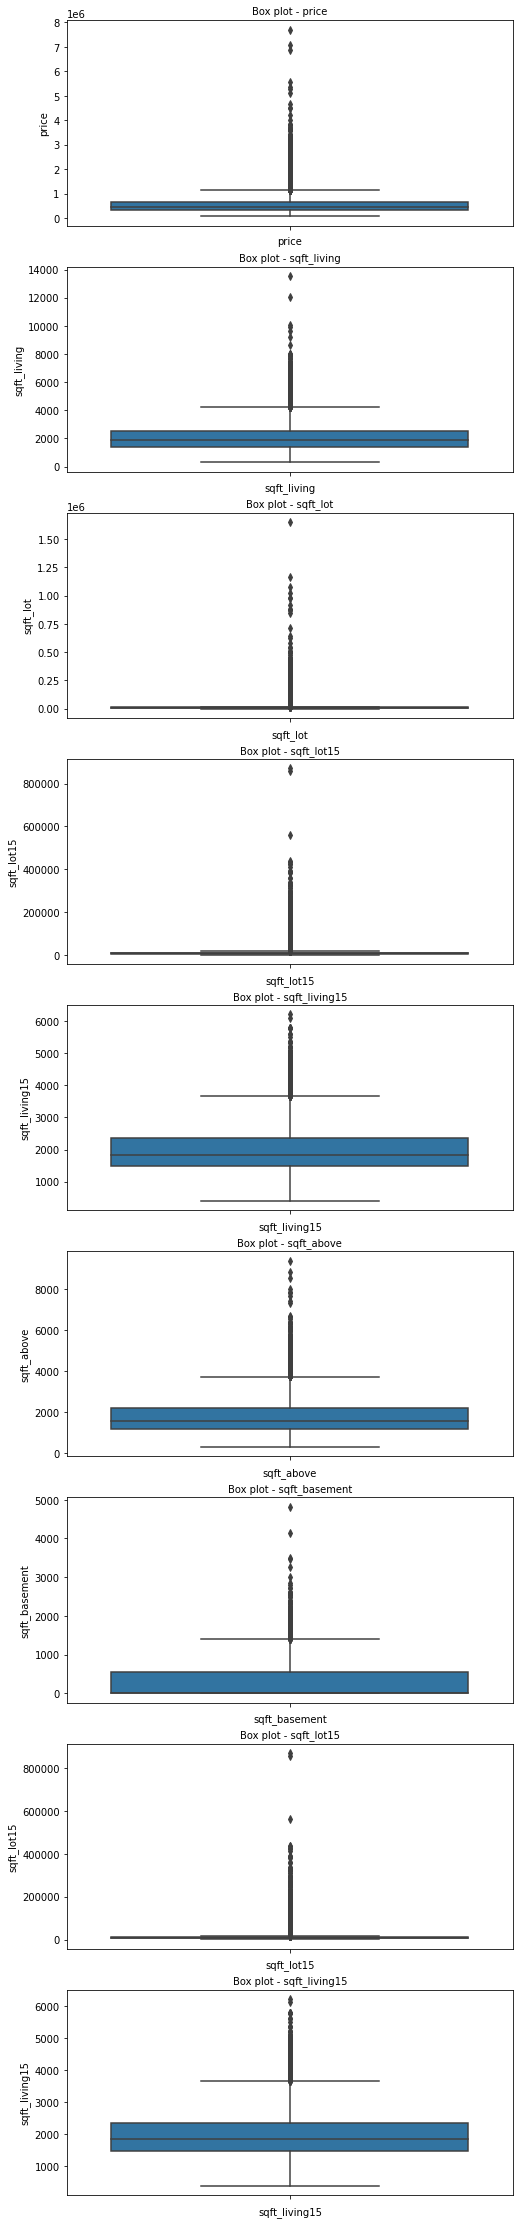

In [54]:
#checking for outliers
col = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col),figsize=(8,40))
for i , col_val in enumerate(col):
  sns.boxplot(y=hass[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()


In [15]:
#Dealing with outliers
q1=hass.quantile(0.25)
q3=hass.quantile(0.75)
interquartile_range=q3-q1

hass[~((hass < (q1 - 1.5 * interquartile_range)) |(hass > (q3 + 1.5 * interquartile_range))).any(axis=1)]
hass.shape

(21607, 14)

In [16]:
#descriptive statistics  of the variables
hass.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,3.409451,7.656685,1788.305086,291.557597,1971.002083,98077.951543,1986.484889,12769.608460
std,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.650785,1.175542,828.186477,442.618358,29.371866,53.505719,685.460263,27307.765664
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000


#Univariate Analysis

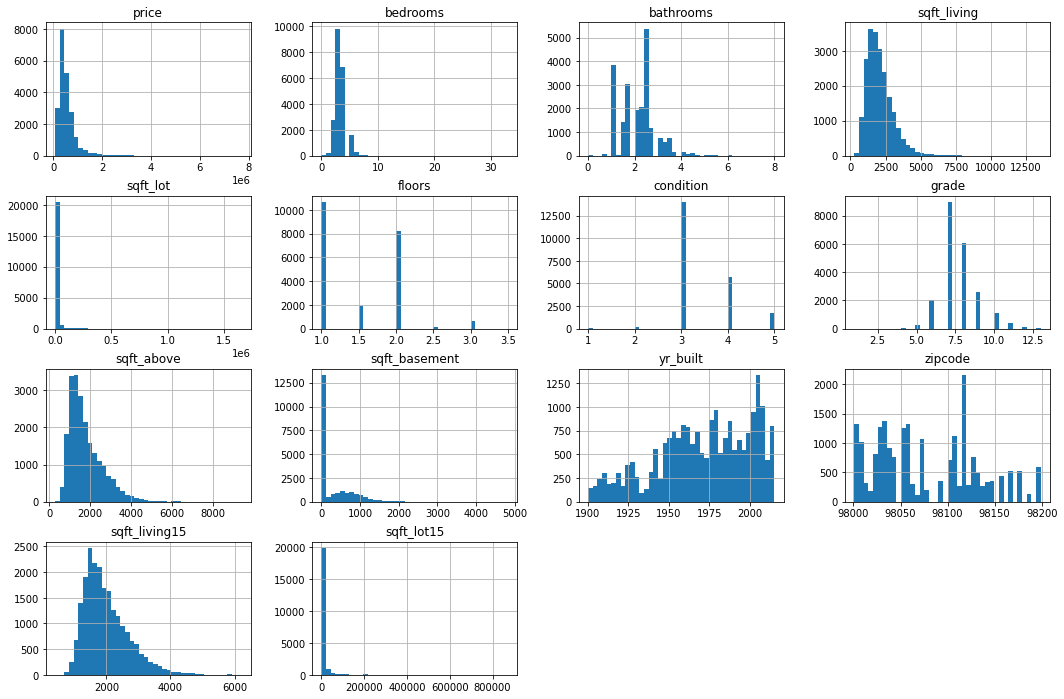

In [17]:
#using histograme to check the distribution in the variables
hass.hist(bins=40, figsize=(18,12))
plt.show()

#Bivariate Analysis

<function matplotlib.pyplot.show>

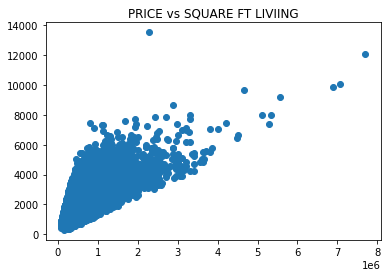

In [18]:
#creating a scatter plot
#scat_plot(hass.price_log, hass.sqft_living)

plt.scatter(data=hass,x='price', y='sqft_living')

plt.title('PRICE vs SQUARE FT LIVIING')
plt.show

<function matplotlib.pyplot.show>

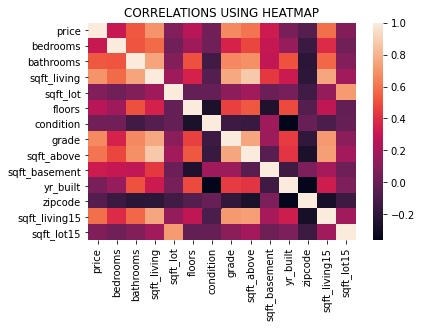

In [19]:
#correlation of the different variables using a heatmap
sns.heatmap(hass.corr(), xticklabels = hass.corr().columns, yticklabels = hass.corr().columns)
plt.title('CORRELATIONS USING HEATMAP')
plt.show
#price has a high correlation with sqft_living and the bathrooms
#price has a low correlation with sqft_lot 

#REGRESSION ANALYSIS

##Multiple Linear Regression

In [20]:
# Displaying the correlations between the independent variables 
drop=hass.drop('price', 1)
correlations = drop.corr()
correlations
#the table below indicates how independent variables are related

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515986,0.576677,0.031695,0.175467,0.028372,0.357039,0.477637,0.303060,0.154373,-0.152773,0.391628,0.029221
bathrooms,0.515986,1.000000,0.754710,0.087761,0.500685,-0.124897,0.664997,0.685359,0.283858,0.505974,-0.203796,0.568696,0.087207
sqft_living,0.576677,0.754710,1.000000,0.172835,0.353958,-0.058783,0.762734,0.876604,0.435065,0.318149,-0.199440,0.756419,0.183285
sqft_lot,0.031695,0.087761,0.172835,1.000000,-0.005142,-0.008976,0.113667,0.183541,0.015257,0.053130,-0.129648,0.144632,0.718555
floors,0.175467,0.500685,0.353958,-0.005142,1.000000,-0.263789,0.458120,0.523864,-0.245642,0.489375,-0.058930,0.279838,-0.011231
condition,0.028372,-0.124897,-0.058783,-0.008976,-0.263789,1.000000,-0.144635,-0.158211,0.174037,-0.361278,0.002899,-0.092883,-0.003443
grade,0.357039,0.664997,0.762734,0.113667,0.458120,-0.144635,1.000000,0.755914,0.168494,0.446969,-0.184728,0.713214,0.119283
sqft_above,0.477637,0.685359,0.876604,0.183541,0.523864,-0.158211,0.755914,1.000000,-0.051903,0.423946,-0.261135,0.731870,0.194069
sqft_basement,0.303060,0.283858,0.435065,0.015257,-0.245642,0.174037,0.168494,-0.051903,1.000000,-0.132999,0.074718,0.200379,0.017244
yr_built,0.154373,0.505974,0.318149,0.053130,0.489375,-0.361278,0.446969,0.423946,-0.132999,1.000000,-0.346746,0.326366,0.071039


In [21]:
#checking the variance inflation factor
vif = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
vif
#VIF will help in checking multicollinearity issues
#the vif tends to be inflated to a large amount for a particular variable relationship

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.629056,-0.444265,-1.588259e+00,0.051521,0.061574,-0.058788,0.333414,5.558885e-01,3.110843e-01,0.087718,0.096191,0.057009,0.089229
bathrooms,-0.444265,3.288547,-9.586553e-01,-0.016906,-0.702002,-0.090114,-0.306754,-4.019955e-01,-6.372097e-01,-0.790177,0.021316,0.108183,0.070141
sqft_living,-1.586780,-0.957216,2.826486e+13,-0.088367,1.117699,-0.750592,-0.589940,-2.548400e+13,-1.361974e+13,0.391622,-0.531024,-0.702671,0.019259
sqft_lot,0.051521,-0.016906,-8.504799e-02,2.088324,0.061420,0.024004,-0.019242,-1.512062e-01,2.526469e-03,0.049825,0.055121,0.129473,-1.471769
floors,0.061574,-0.702002,1.119505e+00,0.061420,1.979542,0.108787,-0.305077,-1.468581e+00,4.620496e-02,-0.370418,-0.264025,0.290351,0.087655
condition,-0.058788,-0.090114,-7.500614e-01,0.024004,0.108787,1.209231,-0.030301,7.240600e-01,2.652284e-01,0.456551,0.164054,0.059728,-0.025581
grade,0.333414,-0.306754,-5.927039e-01,-0.019242,-0.305077,-0.030301,3.227978,-9.564159e-01,-2.845578e-01,-0.413729,-0.159949,-0.897449,0.111754
sqft_above,0.559386,-0.399377,-2.548400e+13,-0.148329,-1.467520,0.724955,-0.959451,2.297674e+13,1.227975e+13,0.043382,0.579100,-0.947492,-0.229186
sqft_basement,0.311702,-0.637505,-1.361974e+13,0.004166,0.046730,0.265526,-0.285545,1.227975e+13,6.562827e+12,0.153266,0.071185,-0.167013,-0.056988
yr_built,0.087718,-0.790177,3.920544e-01,0.049825,-0.370418,0.456551,-0.413729,4.299247e-02,1.530583e-01,1.974076,0.511806,0.001751,-0.070707


From the above table the vif of condition variable and sqft_above variable is highly inflated. i will exclude them from my model to observe the accuracy

In [22]:

hass.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
#splitting our data 
X=hass[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y=hass['price']     


In [24]:

# Dividing our data into training and test sets
# ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit our model

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#making predictions
y_predict = lr.predict(X_test)

In [28]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 142323.23218428966
Mean Squared Error: 47308950956.64296
Root Mean Squared Error: 217506.2090071062


In [29]:
# Test and Training Scores
score = lr.score(X_train, y_train)
score2 = lr.score(X_test, y_test)

print('Training set accuracy: ', '%.2f'%(score))
print('Test set accuracy: ', '%.2f'%(score2))

Training set accuracy:  0.62
Test set accuracy:  0.60


In [30]:
#creating residual plot
residuals = np.subtract(y_predict, y_test)

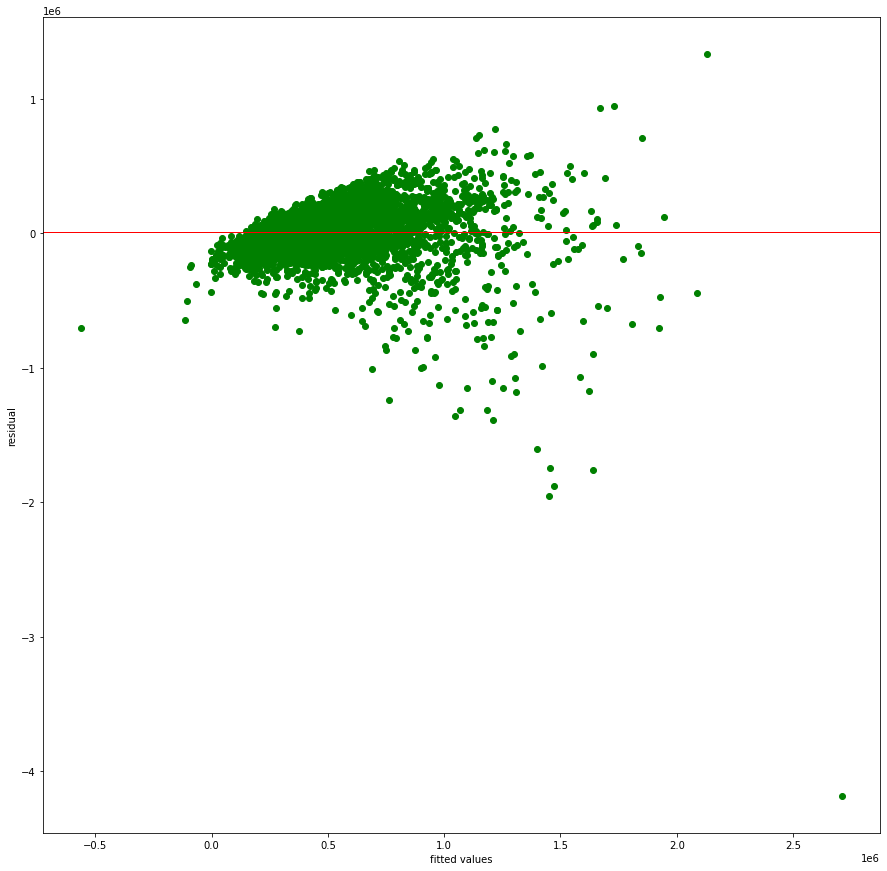

In [103]:
#plotting residual plots
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
plt.scatter(y_predict, residuals, color='green')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()
#the residuals are spread around zero

In [32]:

# Performing the barlett's test
test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_predict) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  
  print('The variances are homogeneous')

The test result of 325.05 is less than the critical value of inf
The variances are homogeneous


##Quantile regression

In [39]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg

# Scale our data to enable PCA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sc = StandardScaler()
y_trainS = sc.fit_transform(y_train.values.reshape(-1,1))
y_testS = sc.transform(y_test.values.reshape(-1,1))


In [40]:
print("mean = " + str(np.mean(X_train[:,4])))
print("std = " + str(np.std(X_train[:,4])))

mean = 1.4079310789576762e-16
std = 1.0


In [51]:
#using pca for feature reduction
#helps in creating less components to go in the model
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [52]:
print('Variance explained by all components: ' + str(pca.explained_variance_ratio_.sum()))
pca.explained_variance_ratio_

Variance explained by all components: 0.8302461692966443


array([0.38247658, 0.15673491, 0.14297311, 0.0868585 , 0.06120308])

In [53]:
principalDf['price'] = y_trainS

In [54]:
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3206
Model:                       QuantReg   Bandwidth:                     0.07735
Method:                 Least Squares   Sparsity:                        1.031
Date:                Sat, 29 May 2021   No. Observations:                17285
Time:                        19:33:23   Df Residuals:                    17279
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0980      0.004    -24.971      0.000      -0.106      -0.090
PrincComp_1     0.2321      0.002    121.386      0.000       0.228       0.236
PrincComp_2    -0.0182      0.003     -6.089      0.000      -0.024      -0.012
PrincComp_3     0.1566      0.003     50.077   

##Ridge Regression

In [56]:
#splitting our data
X=hass[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
     

y = hass['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:

# fibding the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [63]:

#  fit function to run the model and then use the .best_params

# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

In [61]:
#fitting model with ridge information
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Ridge model Root Mean Squared Error: 219621.63035992603


In [62]:
#test set and train set scores
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.61


##Lasso Regression

In [64]:
#splitting our data
X=hass[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
     

y = hass['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [65]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [67]:

# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)

print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


The RMSE for the lasso model: 219650.52860571648


##Elastic Net Regression

In [69]:
#splitting our data
X=hass[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'grade',  'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
     

y = hass['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [70]:
# Normalize the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [71]:
#fitting the function and  using the best params
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [74]:

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
#finding the rmse
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The RMSE for the Elastic model: 219128.17516810988


#Conclusion
There is a very slight change in the RMSE value of the various regression models. More analysis should be done to get significant results.The percentage of the test is not satisfactory(62%)
